In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
os.getcwd()
os.chdir('/home/sachin/Data Science/Datasets')

In [7]:
df = pd.read_csv('bank-additional-full.csv',";")

In [8]:
df.shape

(41188, 21)

In [9]:
#display all row and columns in display
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)


In [10]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [11]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [12]:
df.columns =['age', 'job', 'marital', 'education', 'credit_default', 'housing_loan', 'personal_loan',
       'contact_type', 'last_contact_month', 'last_contact_day_of_week', 'last_contact_duration', 'no_of_contacts', 
              'time_between_contacts','previous_no_of_contacts', 'prev_outcome', 'emp_var_rate', 'consumer_price_index',
              'consumer_conf_index','euribor_3month_rate', 'num_of_employed', 'target']

In [13]:
df.columns

Index(['age', 'job', 'marital', 'education', 'credit_default', 'housing_loan',
       'personal_loan', 'contact_type', 'last_contact_month',
       'last_contact_day_of_week', 'last_contact_duration', 'no_of_contacts',
       'time_between_contacts', 'previous_no_of_contacts', 'prev_outcome',
       'emp_var_rate', 'consumer_price_index', 'consumer_conf_index',
       'euribor_3month_rate', 'num_of_employed', 'target'],
      dtype='object')

In [14]:
df.isnull().sum()

age                         0
job                         0
marital                     0
education                   0
credit_default              0
housing_loan                0
personal_loan               0
contact_type                0
last_contact_month          0
last_contact_day_of_week    0
last_contact_duration       0
no_of_contacts              0
time_between_contacts       0
previous_no_of_contacts     0
prev_outcome                0
emp_var_rate                0
consumer_price_index        0
consumer_conf_index         0
euribor_3month_rate         0
num_of_employed             0
target                      0
dtype: int64

In [15]:
#Understand Unique values of each column
colnames=[]
col_unique_vals = []
for col in df.columns:
    colnames.append(col)
    col_unique_vals.append(df[col].nunique())

unique_counts_df = pd.DataFrame(col_unique_vals,index=colnames)
unique_counts_df.columns = ['Uniques']

In [16]:
unique_counts_df

,Uniques
age,78
job,12
marital,4
education,8
credit_default,3
housing_loan,3
personal_loan,3
contact_type,2
last_contact_month,10
last_contact_day_of_week,5


## Checking Class Balance

In [17]:
#univariate analysis of the target
df['target'].value_counts()

no     36548
yes     4640
Name: target, dtype: int64

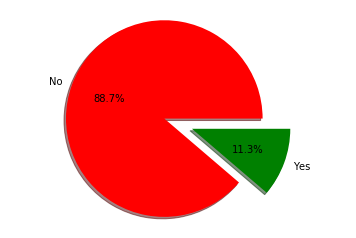

In [18]:
#Visual representation of Inbalance dataset
labels = 'No', 'Yes'
sizes = [36548, 4640]
colors = ['red', 'green']
explode = (0.3, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=0)
 
plt.axis('equal')
plt.show()

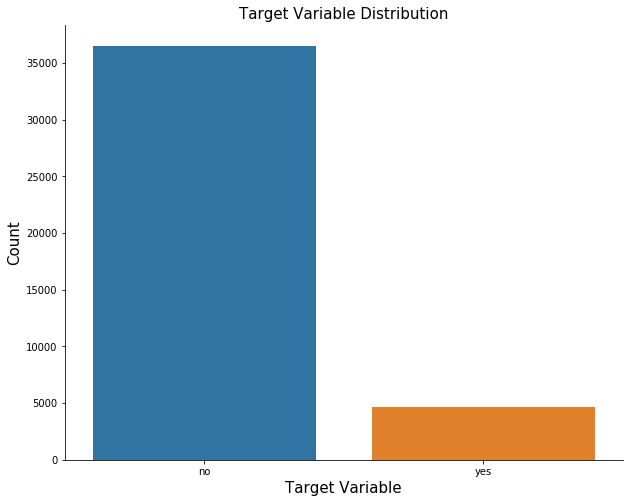

In [19]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
sns.countplot(x = 'target', data = df)
ax.set_xlabel('Target Variable', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Target Variable Distribution', fontsize=15)
sns.despine()
# there is a class imbalance that needs to be handled

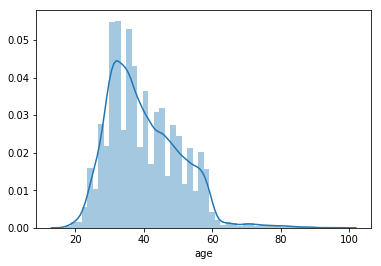

In [20]:
sns.distplot(df['age'])

In [21]:
# outlier detection code
Q1=df['age'].quantile(q = 0.25)
Q2=df['age'].quantile(q = 0.50)
Q3=df['age'].quantile(q = 0.75)
Q4=df['age'].quantile(q = 1.00)                        

IQR= Q3-Q1

print('1st Quartile: ', Q1)
print('2nd Quartile: ', Q2)
print('3rd Quartile: ', Q3)
print('4th Quartile: ', Q4)
print('IQR: ',IQR)


print('Ages above: ', Q3 + 1.5*(IQR), 'are outliers')
print('Ages below: ', Q1 - 1.5*(IQR), 'are outliers')
print('There are',sum((df['age']>(Q3 + 1.5*(IQR))) | (df['age'] < (Q1 - 1.5*(IQR)))),"outliers")

1st Quartile:  32.0
2nd Quartile:  38.0
3rd Quartile:  47.0
4th Quartile:  98.0
IQR:  15.0
Ages above:  69.5 are outliers
Ages below:  9.5 are outliers
There are 469 outliers


In [22]:
sum((df['age']>(Q3 + 1.5*(IQR))) | (df['age'] < (Q1 - 1.5*(IQR))))

469

In [23]:
df['age'].sort_values(ascending = False)

38452    98
38455    98
27826    95
38921    94
40450    92
40469    92
39655    92
39734    92
38032    91
38022    91
40639    89
39847    89
27814    88
27800    88
27802    88
27815    88
27805    88
27808    88
27816    88
27817    88
27818    88
37775    88
27810    88
27811    88
27812    88
27813    88
38415    88
30430    88
37472    88
38410    88
40631    88
40636    88
40621    88
36183    88
37743    87
40727    86
40718    86
39377    86
38936    86
39011    86
40001    86
38206    86
40651    86
30006    85
30072    85
38326    85
30078    85
39477    85
40638    85
37341    85
39186    85
39043    85
39041    85
39479    85
30103    85
39475    85
30110    85
39476    85
40986    84
39737    84
40969    84
39402    84
40714    84
40262    84
39042    84
39947    83
38179    83
35856    83
40045    83
30214    83
40119    83
38322    83
40117    83
38065    83
37946    83
40686    83
40669    83
40050    83
38968    83
38901    83
38909    83
38967    83
38191    82
3941

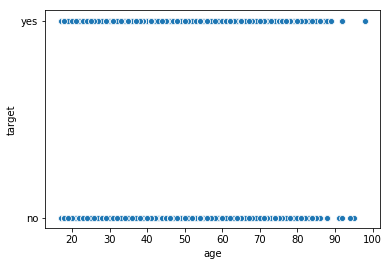

In [24]:
sns.scatterplot(x = df['age'],y=df['target'])

In [25]:
pd.crosstab(pd.cut(df['age'],bins=[17,20,25,55,60,100]),df['target']) # hence we will create a new feature out of this variable

target,no,yes
age,,
"(17, 20]",80,55
"(20, 25]",1234,292
"(25, 55]",32390,3550
"(55, 60]",2345,327
"(60, 100]",496,414


In [26]:
temp = pd.crosstab(df['job'],df['target']) 
temp['ratio'] = temp['yes']/temp['no']
print(temp)

target           no   yes     ratio
job                                
admin.         9070  1352  0.149063
blue-collar    8616   638  0.074048
entrepreneur   1332   124  0.093093
housemaid       954   106  0.111111
management     2596   328  0.126348
retired        1286   434  0.337481
self-employed  1272   149  0.117138
services       3646   323  0.088590
student         600   275  0.458333
technician     6013   730  0.121404
unemployed      870   144  0.165517
unknown         293    37  0.126280


In [27]:
df['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [28]:
temp = pd.crosstab(df['education'],df['target']) 
temp['ratio'] = temp['yes']/temp['no']
print(temp)

target                  no   yes     ratio
education                                 
basic.4y              3748   428  0.114194
basic.6y              2104   188  0.089354
basic.9y              5572   473  0.084889
high.school           8484  1031  0.121523
illiterate              14     4  0.285714
professional.course   4648   595  0.128012
university.degree    10498  1670  0.159078
unknown               1480   251  0.169595


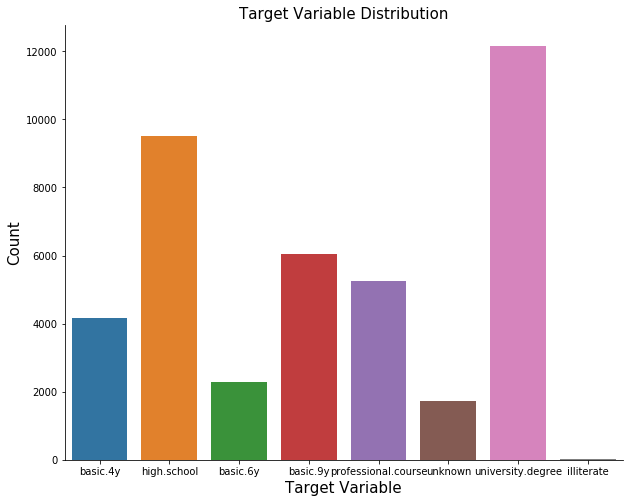

In [29]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
sns.countplot(x = 'education', data = df)
ax.set_xlabel('Target Variable', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Target Variable Distribution', fontsize=15)
sns.despine()

In [30]:
temp = pd.crosstab(df['credit_default'],df['target']) 
temp['ratio'] = temp['yes']/temp['no']
print(temp)

target             no   yes     ratio
credit_default                       
no              28391  4197  0.147829
unknown          8154   443  0.054329
yes                 3     0  0.000000


In [31]:
temp = pd.crosstab(df['housing_loan'],df['target']) 
temp['ratio'] = temp['yes']/temp['no']
print(temp)

target           no   yes     ratio
housing_loan                       
no            16596  2026  0.122078
unknown         883   107  0.121178
yes           19069  2507  0.131470


In [32]:
temp = pd.crosstab(df['personal_loan'],df['target']) 
temp['ratio'] = temp['yes']/temp['no']
print(temp)

target            no   yes     ratio
personal_loan                       
no             30100  3850  0.127907
unknown          883   107  0.121178
yes             5565   683  0.122731


In [33]:
temp = pd.crosstab(df['contact_type'],df['target']) 
temp['ratio'] = temp['yes']/temp['no']
print(temp)

target           no   yes     ratio
contact_type                       
cellular      22291  3853  0.172850
telephone     14257   787  0.055201


In [34]:
temp = pd.crosstab(df['contact_type'],df['target']) 
temp['ratio'] = temp['yes']/temp['no']
print(temp)

target           no   yes     ratio
contact_type                       
cellular      22291  3853  0.172850
telephone     14257   787  0.055201


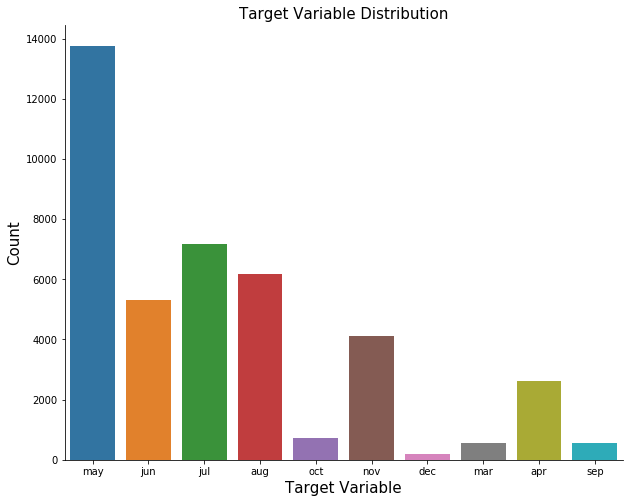

In [35]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
sns.countplot(x = 'last_contact_month', data = df)
ax.set_xlabel('Target Variable', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Target Variable Distribution', fontsize=15)
sns.despine()

In [36]:
temp = pd.crosstab(df['last_contact_month'],df['target']) 
temp['ratio'] = temp['yes']/temp['no']
print(temp.sort_values(by = ['ratio'], ascending = False))

target                 no  yes     ratio
last_contact_month                      
mar                   270  276  1.022222
dec                    93   89  0.956989
sep                   314  256  0.815287
oct                   403  315  0.781638
apr                  2093  539  0.257525
aug                  5523  655  0.118595
jun                  4759  559  0.117462
nov                  3685  416  0.112890
jul                  6525  649  0.099464
may                 12883  886  0.068773


In [37]:
temp = pd.crosstab(df['no_of_contacts'],df['target']) 
temp['ratio'] = temp['yes']/temp['no']
print(temp.sort_values(by = ['ratio'], ascending = False))

target             no   yes     ratio
no_of_contacts                       
1               15342  2300  0.149915
2                9359  1211  0.129394
3                4767   574  0.120411
4                2402   249  0.103664
6                 904    75  0.082965
5                1479   120  0.081136
17                 54     4  0.074074
11                165    12  0.072727
23                 15     1  0.066667
7                 591    38  0.064298
9                 266    17  0.063910
10                213    12  0.056338
13                 88     4  0.045455
8                 383    17  0.044386
15                 49     2  0.040816
12                122     3  0.024590
14                 68     1  0.014706
43                  2     0  0.000000
30                  7     0  0.000000
42                  2     0  0.000000
41                  1     0  0.000000
40                  2     0  0.000000
39                  1     0  0.000000
37                  1     0  0.000000
35          

In [38]:
temp =pd.crosstab(pd.cut(df['no_of_contacts'],bins=[1,2,3,4,5,6,7,8,9,10,20,25,55,60,100]),df['target']) # hence we will create a new feature out of this variable
temp['ratio'] = temp['yes']/temp['no']
print(temp.sort_values(by = ['ratio'], ascending = False))

target            no   yes     ratio
no_of_contacts                      
(1, 2]          9359  1211  0.129394
(2, 3]          4767   574  0.120411
(3, 4]          2402   249  0.103664
(5, 6]           904    75  0.082965
(4, 5]          1479   120  0.081136
(6, 7]           591    38  0.064298
(8, 9]           266    17  0.063910
(9, 10]          213    12  0.056338
(7, 8]           383    17  0.044386
(10, 20]         686    26  0.037901
(20, 25]          79     1  0.012658
(25, 55]          76     0  0.000000
(55, 60]           1     0  0.000000


In [39]:
temp =pd.crosstab(pd.cut(df['time_between_contacts'],bins=[1,2,3,4,5,6,7,8,9,10,20,25,55,60,100,1000]),df['target']) # hence we will create a new feature out of this variable
temp['ratio'] = temp['yes']/temp['no']
print(temp.sort_values(by = ['ratio'], ascending = False))

target                    no   yes     ratio
time_between_contacts                       
(25, 55]                   0     2       inf
(20, 25]                   1     5  5.000000
(5, 6]                   123   289  2.349593
(2, 3]                   141   298  2.113475
(6, 7]                    20    40  2.000000
(7, 8]                     6    12  2.000000
(4, 5]                    17    29  1.705882
(1, 2]                    24    37  1.541667
(9, 10]                   22    30  1.363636
(10, 20]                  87   109  1.252874
(8, 9]                    29    35  1.206897
(3, 4]                    55    63  1.145455
(100, 1000]            36000  3673  0.102028


In [40]:
df['time_between_contacts'].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: time_between_contacts, dtype: int64

In [41]:
temp =pd.crosstab(df['previous_no_of_contacts'],df['target']) # hence we will create a new feature out of this variable
temp['ratio'] = temp['yes']/temp['no']
print(temp.sort_values(by = ['ratio'], ascending = False))

target                      no   yes     ratio
previous_no_of_contacts                       
5                            5    13  2.600000
6                            2     3  1.500000
3                           88   128  1.454545
4                           32    38  1.187500
2                          404   350  0.866337
1                         3594   967  0.269060
0                        32422  3141  0.096879
7                            1     0  0.000000


In [42]:
temp =pd.crosstab(df['prev_outcome'],df['target']) # hence we will create a new feature out of this variable
temp['ratio'] = temp['yes']/temp['no']
print(temp.sort_values(by = ['ratio'], ascending = False))

target           no   yes     ratio
prev_outcome                       
success         479   894  1.866388
failure        3647   605  0.165890
nonexistent   32422  3141  0.096879


In [43]:
temp =pd.crosstab(pd.cut(df['emp_var_rate'],bins=[-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10,20,25,55,60,100,1000]),df['target']) # hence we will create a new feature out of this variable
temp['ratio'] = temp['yes']/temp['no']
print(temp.sort_values(by = ['ratio'], ascending = False))

target           no   yes     ratio
emp_var_rate                       
(-3, -2]       1069   594  0.555659
(-2, -1]       8427  2165  0.256912
(-1, 0]        3460   233  0.067341
(1, 2]        22891  1106  0.048316


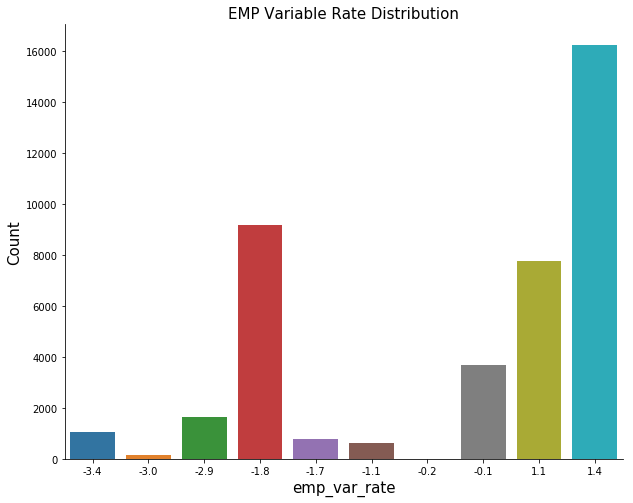

In [44]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
sns.countplot(x = 'emp_var_rate', data = df)
ax.set_xlabel('emp_var_rate', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('EMP Variable Rate Distribution', fontsize=15)
sns.despine()

In [45]:
df.corr()

,age,last_contact_duration,no_of_contacts,time_between_contacts,previous_no_of_contacts,emp_var_rate,consumer_price_index,consumer_conf_index,euribor_3month_rate,num_of_employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
last_contact_duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
no_of_contacts,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
time_between_contacts,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous_no_of_contacts,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp_var_rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
consumer_price_index,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
consumer_conf_index,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor_3month_rate,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
num_of_employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


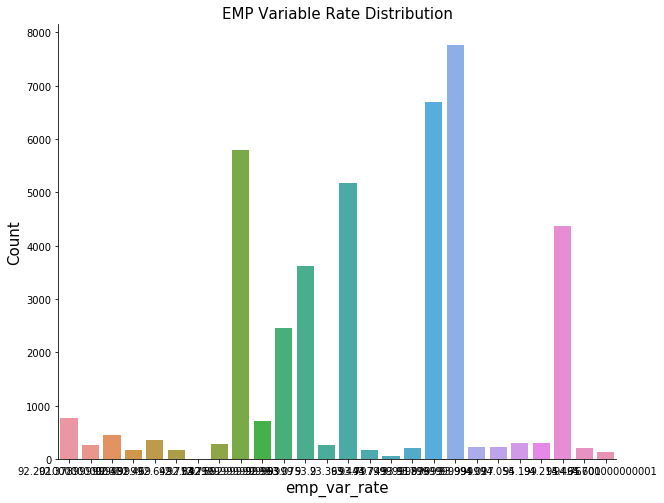

In [46]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
sns.countplot(x = 'consumer_price_index', data = df)
ax.set_xlabel('emp_var_rate', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('EMP Variable Rate Distribution', fontsize=15)
sns.despine()

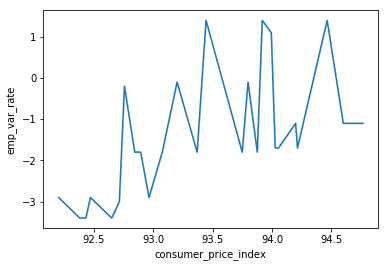

In [47]:
sns.lineplot(df['consumer_price_index'],df['emp_var_rate'])

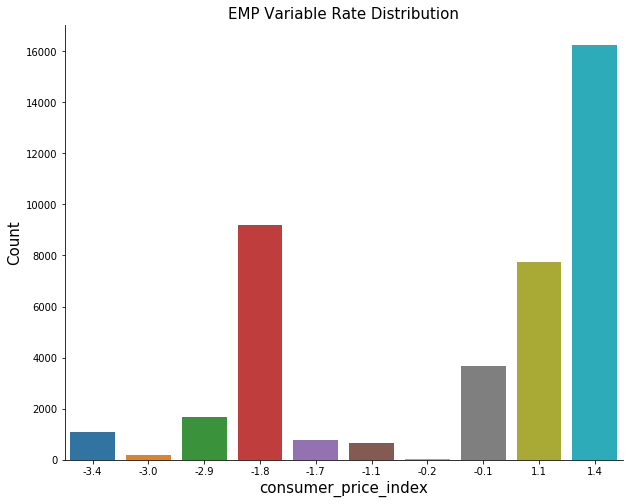

In [48]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
sns.countplot(x = 'emp_var_rate', data = df)
ax.set_xlabel('consumer_price_index', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('EMP Variable Rate Distribution', fontsize=15)
sns.despine()

In [49]:
temp = pd.crosstab(df['emp_var_rate'],df['target']) 
temp['ratio'] = temp['yes']/temp['no']
print(temp.sort_values(by = ['ratio'], ascending = False))

target           no   yes     ratio
emp_var_rate                       
-1.7            370   403  1.089189
-3.0             84    88  1.047619
-1.1            334   301  0.901198
-3.4            617   454  0.735818
-2.9           1069   594  0.555659
-1.8           7723  1461  0.189175
-0.2              9     1  0.111111
-0.1           3451   232  0.067227
 1.4          15368   866  0.056351
 1.1           7523   240  0.031902


In [50]:
temp = pd.crosstab(df['consumer_price_index'],df['target']) 
temp['ratio'] = temp['yes']/temp['no']
print(temp.sort_values(by = ['ratio'], ascending = False))

target                  no  yes     ratio
consumer_price_index                     
93.798                  25   42  1.680000
93.876                  90  122  1.355556
93.369                 114  150  1.315789
94.215                 135  176  1.303704
93.749                  77   97  1.259740
94.027                 113  120  1.061947
92.713                  84   88  1.047619
94.199                 153  150  0.980392
92.649                 189  168  0.888889
94.055                 122  107  0.877049
94.601                 111   93  0.837838
94.767                  70   58  0.828571
92.843                 156  126  0.807692
92.431                 267  180  0.674157
92.379                 161  106  0.658385
92.469                 112   66  0.589286
92.963                 451  264  0.585366
92.201                 506  264  0.521739
93.075                2016  442  0.219246
92.756                   9    1  0.111111
92.893                5270  524  0.099431
93.918                6278  407  0

In [51]:
temp = pd.crosstab(df['consumer_conf_index'],df['target']) 
temp['ratio'] = temp['yes']/temp['no']
print(temp.sort_values(by = ['ratio'], ascending = False))

target                 no  yes     ratio
consumer_conf_index                     
-40.4                  25   42  1.680000
-40.0                  90  122  1.355556
-34.8                 114  150  1.315789
-40.3                 135  176  1.303704
-34.6                  77   97  1.259740
-38.3                 113  120  1.061947
-33.0                  84   88  1.047619
-37.5                 153  150  0.980392
-30.1                 189  168  0.888889
-39.8                 122  107  0.877049
-49.5                 111   93  0.837838
-50.8                  70   58  0.828571
-50.0                 156  126  0.807692
-26.9                 267  180  0.674157
-29.8                 161  106  0.658385
-33.6                 112   66  0.589286
-40.8                 451  264  0.585366
-31.4                 506  264  0.521739
-47.1                2016  442  0.219246
-45.9                   9    1  0.111111
-46.2                5270  524  0.099431
-42.7                6278  407  0.064830
-42.0           

In [52]:
temp = pd.crosstab(df['euribor_3month_rate'],df['target']) 
temp['ratio'] = temp['yes']/temp['no']
print(temp.sort_values(by = ['ratio'], ascending = False))

target                 no  yes      ratio
euribor_3month_rate                      
3.053                   0    1        inf
0.688                   0    3        inf
0.933                   0    1        inf
0.870                   1   12  12.000000
0.885                   1    9   9.000000
0.755                   1    6   6.000000
4.936                   1    5   5.000000
0.637                   1    5   5.000000
1.548                   1    5   5.000000
0.697                   4   19   4.750000
1.726                   2    9   4.500000
4.794                   1    4   4.000000
0.683                   3   11   3.666667
0.652                   8   27   3.375000
0.762                   1    3   3.000000
0.634                   2    6   3.000000
4.223                   1    3   3.000000
0.900                   7   20   2.857143
0.733                   5   13   2.600000
0.802                   2    5   2.500000
0.985                   2    5   2.500000
1.799                   4   10   2

In [53]:
numeric_df = df[['age','emp_var_rate','consumer_price_index','consumer_conf_index',
                 'euribor_3month_rate','num_of_employed','last_contact_day_of_week' ]]

In [54]:
list(df)

['age',
 'job',
 'marital',
 'education',
 'credit_default',
 'housing_loan',
 'personal_loan',
 'contact_type',
 'last_contact_month',
 'last_contact_day_of_week',
 'last_contact_duration',
 'no_of_contacts',
 'time_between_contacts',
 'previous_no_of_contacts',
 'prev_outcome',
 'emp_var_rate',
 'consumer_price_index',
 'consumer_conf_index',
 'euribor_3month_rate',
 'num_of_employed',
 'target']

In [55]:
df.dtypes

age                           int64
job                          object
marital                      object
education                    object
credit_default               object
housing_loan                 object
personal_loan                object
contact_type                 object
last_contact_month           object
last_contact_day_of_week     object
last_contact_duration         int64
no_of_contacts                int64
time_between_contacts         int64
previous_no_of_contacts       int64
prev_outcome                 object
emp_var_rate                float64
consumer_price_index        float64
consumer_conf_index         float64
euribor_3month_rate         float64
num_of_employed             float64
target                       object
dtype: object

In [56]:
# outlier detection code
col = 'no_of_contacts'
Q1=df[col].quantile(q = 0.25)
Q2=df[col].quantile(q = 0.50)
Q3=df[col].quantile(q = 0.75)
Q4=df[col].quantile(q = 1.00)                        

IQR= Q3-Q1

print('1st Quartile: ', Q1)
print('2nd Quartile: ', Q2)
print('3rd Quartile: ', Q3)
print('4th Quartile: ', Q4)
print('IQR: ',IQR)


print('Ages above: ', Q3 + 1.5*(IQR), 'are outliers')
print('Ages below: ', Q1 - 1.5*(IQR), 'are outliers')
print('There are',sum((df[col]>(Q3 + 1.5*(IQR))) | (df[col] < (Q1 - 1.5*(IQR)))),"outliers in ", col)

1st Quartile:  1.0
2nd Quartile:  2.0
3rd Quartile:  3.0
4th Quartile:  56.0
IQR:  2.0
Ages above:  6.0 are outliers
Ages below:  -2.0 are outliers
There are 2406 outliers in  no_of_contacts


In [57]:
numeric_cols = ['age',
 'last_contact_duration',
 'no_of_contacts',
 'time_between_contacts',
 'previous_no_of_contacts',
 'emp_var_rate',
 'consumer_price_index',
 'consumer_conf_index',
 'euribor_3month_rate',
 'num_of_employed']
for col in numeric_cols:

    Q1=df[col].quantile(q = 0.25)
    Q2=df[col].quantile(q = 0.50)
    Q3=df[col].quantile(q = 0.75)
    Q4=df[col].quantile(q = 1.00)                        

    IQR= Q3-Q1
    print('The Range for',col ,'is', Q1 - 1.5*(IQR), 'to', Q3 + 1.5*(IQR))
    print('There are',sum((df[col]>(Q3 + 1.5*(IQR))) | (df[col] < (Q1 - 1.5*(IQR)))),"outliers in ", col)

The Range for age is 9.5 to 69.5
There are 469 outliers in  age
The Range for last_contact_duration is -223.5 to 644.5
There are 2963 outliers in  last_contact_duration
The Range for no_of_contacts is -2.0 to 6.0
There are 2406 outliers in  no_of_contacts
The Range for time_between_contacts is 999.0 to 999.0
There are 1515 outliers in  time_between_contacts
The Range for previous_no_of_contacts is 0.0 to 0.0
There are 5625 outliers in  previous_no_of_contacts
The Range for emp_var_rate is -6.6000000000000005 to 6.200000000000001
There are 0 outliers in  emp_var_rate
The Range for consumer_price_index is 91.69650000000001 to 95.3725
There are 0 outliers in  consumer_price_index
The Range for consumer_conf_index is -52.150000000000006 to -26.949999999999992
There are 447 outliers in  consumer_conf_index
The Range for euribor_3month_rate is -4.081499999999999 to 10.3865
There are 0 outliers in  euribor_3month_rate
The Range for num_of_employed is 4905.6 to 5421.6
There are 0 outliers in  

In [58]:
numeric_df = df[['age',
 'last_contact_duration',
 'no_of_contacts',
 'time_between_contacts',
 'previous_no_of_contacts',
 'emp_var_rate',
 'consumer_price_index',
 'consumer_conf_index',
 'euribor_3month_rate',
 'num_of_employed']]

In [59]:
numeric_df.corr()

,age,last_contact_duration,no_of_contacts,time_between_contacts,previous_no_of_contacts,emp_var_rate,consumer_price_index,consumer_conf_index,euribor_3month_rate,num_of_employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
last_contact_duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
no_of_contacts,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
time_between_contacts,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous_no_of_contacts,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp_var_rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
consumer_price_index,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
consumer_conf_index,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor_3month_rate,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
num_of_employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


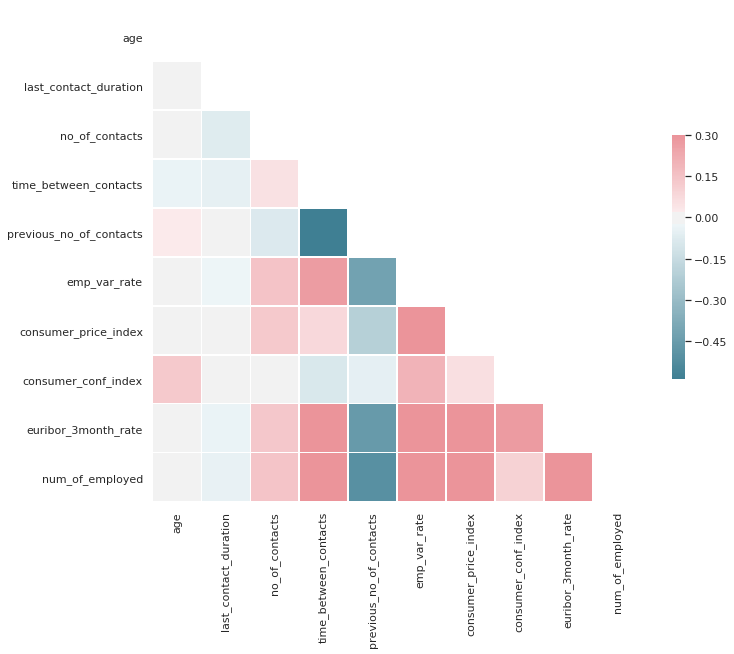

In [60]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = numeric_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [61]:
import pandas.rpy.common as com
import seaborn as sns
%matplotlib inline

# load the R package ISLR
infert = com.importr("ISLR")

# load the Auto dataset
auto_df = com.load_data('Auto')

# calculate the correlation matrix
corr = numeric_df.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

ModuleNotFoundError: No module named 'pandas.rpy'

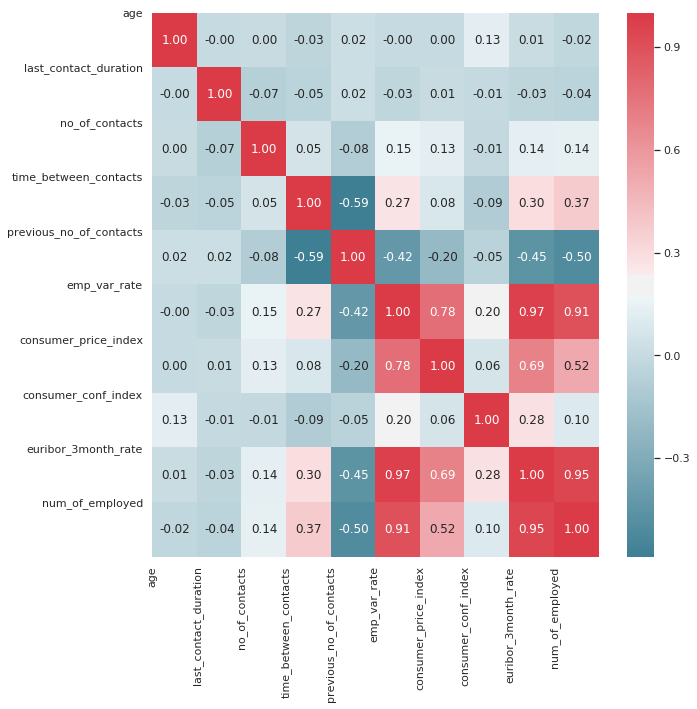

In [62]:
def heatMap(df):
    #Create Correlation df
    corr = df.corr()
    #Plot figsize
    fig, ax = plt.subplots(figsize=(10, 10))
    #Generate Color Map
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
    #Generate Heat Map, allow annotations and place floats in map
    sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
    #Apply xticks
    plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
    plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
    plt.show()
    
heatMap(numeric_df)

In [63]:
list(numeric_df)

['age',
 'last_contact_duration',
 'no_of_contacts',
 'time_between_contacts',
 'previous_no_of_contacts',
 'emp_var_rate',
 'consumer_price_index',
 'consumer_conf_index',
 'euribor_3month_rate',
 'num_of_employed']

In [64]:
temp =pd.crosstab(pd.cut(df['emp_var_rate'],bins=3),df['target']) # hence we will create a new feature out of this variable
temp['ratio'] = temp['yes']/temp['no']
print(temp.sort_values(by = ['ratio'], ascending = False))

target             no   yes     ratio
emp_var_rate                         
(-1.8, -0.2]      704   704  1.000000
(-3.405, -1.8]   9493  2597  0.273570
(-0.2, 1.4]     26351  1339  0.050814


In [65]:
temp =pd.crosstab(pd.cut(df['num_of_employed'],bins=15),df['target']) # hence we will create a new feature out of this variable
temp['ratio'] = temp['yes']/temp['no']
print(temp.sort_values(by = ['ratio'], ascending = False))

target                   no   yes     ratio
num_of_employed                            
(4998.867, 5016.5]      281   369  1.313167
(4981.233, 4998.867]    370   403  1.089189
(4963.336, 4981.233]    334   301  0.901198
(5016.5, 5034.133]      701   542  0.773181
(5069.4, 5087.033]     1069   594  0.555659
(5087.033, 5104.667]   7442  1092  0.146735
(5192.833, 5210.467]   3451   232  0.067227
(5210.467, 5228.1]    15368   866  0.056351
(5175.2, 5192.833]     7532   241  0.031997
